<center>
    <h1> 
        Teste de Hipótese 1.5: Comparação da Quantização de Brilho Entre HSV e HLS
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<p>No teste 1.5 vimos que a média da saturação com as amostras no padrão HSV não apresentaram um padrão distinguível entre as amostras boas e ruins. Entretando, por falta de compreensão cometi o engano de interpretar a saturação como se fosse equivalente o brilho. Nesse notebook iremos avaliar o "valor" do HSV e testar as nédias das amostras para o padrão HLS.</p>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Calculando a média da saturação e do "valor" das amostras apartir do formato HSV <br>
2. Calculando a média da saturação e do brilho das amostras apartir do formato HLS  <br>
3. Calculando a média final do valor das amostras boas <br>
4. Teste de ajuste de "valor" com a referência do "valor" médio encontrado <br>
5. Conclusão

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

# 1. Calculando a média da saturação e do "valor" das amostras apartir do formato HSV

In [3]:
# Lista de nomes para facilitar o acesso as pastas e aos arquivos
documentos = ['rg_frente','rg_tras','cnh_frente','cnh_tras']

In [4]:
docs_bons = [] # Lista para salvar as imagens 
for k in documentos:    # Laço iterando sobre a lista de nomes
    for i in range(0,20):   # Laço para normalizar todos os histogramas do referido documento da vez
        docs_bons.append(cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HSV))

In [5]:
docs_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        docs_ruins.append(cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HSV))

In [6]:
# Calculando as médias de saturação de cada imagem
media_sat_bons = []
media_val_bons = []
media_sat_ruins = []
media_val_ruins = []

for h in docs_bons:
    _, S, V =  cv2.split(h)
    media_sat_bons.append(np.mean(S))
    media_val_bons.append(np.mean(V))
    
for h in docs_ruins:
    _, S, V =  cv2.split(h)
    media_sat_ruins.append(np.mean(S))
    media_val_ruins.append(np.mean(V))

In [7]:
# Calculando a média total de saturação de cada tipo de documento
media_sat_final_ruins = []
media_val_final_ruins = []
media_sat_final_bons = []
media_val_final_bons = []

for i in range(len(documentos)):
    media_sat_final_ruins.append(np.mean(media_sat_ruins[7*i:7*(i+1)])) # [7*i:7*(i+1)] iterar sobre o fatiamento
    media_sat_final_bons.append(np.mean(media_sat_bons[20*i:20*(i+1)]))
    
    media_val_final_ruins.append(np.mean(media_val_ruins[7*i:7*(i+1)]))
    media_val_final_bons.append(np.mean(media_val_bons[20*i:20*(i+1)]))

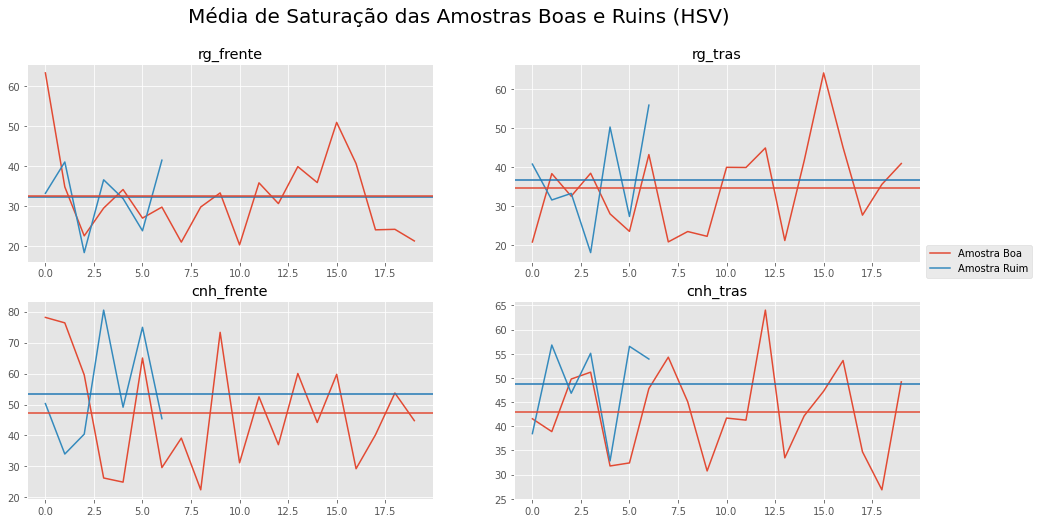

In [8]:
# Plot para visualizar a diferenças das médias de saturação de cada tipo de documento

n = len(documentos) # Número de figuras

fig = plt.figure(figsize=(16,8))

for i in range(n): # Laço para automatizar as plotagens
    fig.add_subplot(2,2,i+1) # Adiciona um novo subplot em cada iteração
    
    # Plot das médias de saturação das amostras
    plt.plot(list(range(20)), media_sat_bons[20*i:20*(i+1)]) # [20*i:20*(i+1)] iterar sobre a porção de cada
    plt.plot(list(range(7)), media_sat_ruins[7*i:7*(i+1)])   # tipo de documento
    
    # Plot da média final de cada tipo de documento em forma de linha
    plt.axhline(media_sat_final_ruins[i], c='tab:blue')
    plt.axhline(media_sat_final_bons[i])
    
    plt.title(documentos[i])
    
fig.legend(['Amostra Boa','Amostra Ruim'], loc='center right')
fig.suptitle('Média de Saturação das Amostras Boas e Ruins (HSV)', fontsize=20)
plt.show();

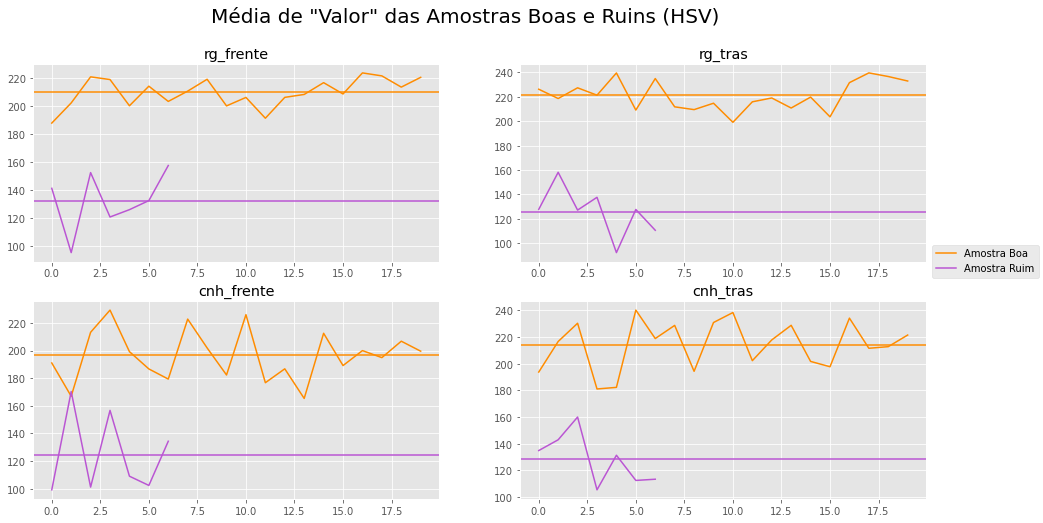

In [9]:
# Plot para visualizar a diferenças das médias de saturação de cada tipo de documento

n = len(documentos) # Número de figuras

fig = plt.figure(figsize=(16,8))

for i in range(n): # Laço para automatizar as plotagens
    fig.add_subplot(2,2,i+1) # Adiciona um novo subplot em cada iteração
        
    # Plot das médias de saturação das amostras
    plt.plot(list(range(20)), media_val_bons[20*i:20*(i+1)], c='darkorange') # [20*i:20*(i+1)] iterar sobre a porção de cada
    plt.plot(list(range(7)), media_val_ruins[7*i:7*(i+1)], c='mediumorchid')   # tipo de documento
    
    # Plot da média final de cada tipo de documento em forma de linha
    plt.axhline(media_val_final_ruins[i], c='mediumorchid')
    plt.axhline(media_val_final_bons[i], c='darkorange')
    
    plt.title(documentos[i])
    
fig.legend(['Amostra Boa','Amostra Ruim'], loc='center right')
fig.suptitle('Média de "Valor" das Amostras Boas e Ruins (HSV)', fontsize=20)
plt.show();

Podemos ver que no "valor" há uma diferença clara no padrão das amostras boas e das amostras ruins.

# 2. Calculando a média da saturação e do brilho das amostras apartir do formato HLS

In [10]:
hls_bons = [] # Lista para salvar as imagens 
for k in documentos:    # Laço iterando sobre a lista de nomes
    for i in range(0,20):   # Laço para normalizar todos os histogramas do referido documento da vez
        hls_bons.append(cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HLS))

In [11]:
hls_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        hls_ruins.append(cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2HLS))

In [12]:
# Calculando as médias de saturação de cada imagem
media_sat_bons = []
media_lig_bons = []
media_sat_ruins = []
media_lig_ruins = []

for h in docs_bons:
    _, L, S =  cv2.split(h)
    media_lig_bons.append(np.mean(L))
    media_sat_bons.append(np.mean(S))
    
for h in docs_ruins:
    _, L, S =  cv2.split(h)
    media_lig_ruins.append(np.mean(L))
    media_sat_ruins.append(np.mean(S))

In [13]:
# Calculando a média total de saturação de cada tipo de documento
media_sat_final_ruins = []
media_lig_final_ruins = []
media_sat_final_bons = []
media_lig_final_bons = []

for i in range(len(documentos)):
    media_sat_final_ruins.append(np.mean(media_sat_ruins[7*i:7*(i+1)])) # [7*i:7*(i+1)] iterar sobre o fatiamento
    media_sat_final_bons.append(np.mean(media_sat_bons[20*i:20*(i+1)]))
    
    media_lig_final_ruins.append(np.mean(media_lig_ruins[7*i:7*(i+1)]))
    media_lig_final_bons.append(np.mean(media_lig_bons[20*i:20*(i+1)]))

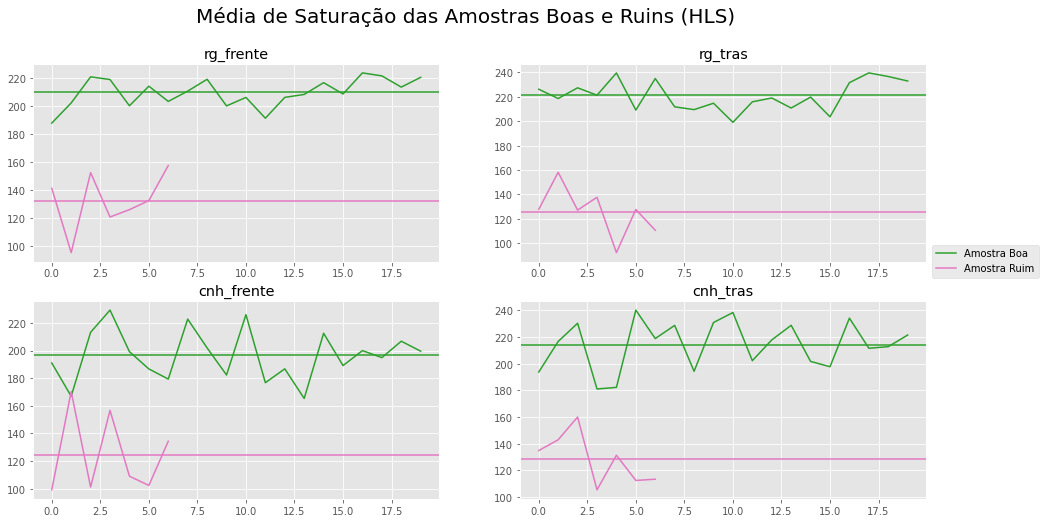

In [14]:
# Plot para visualizar a diferenças das médias de saturação de cada tipo de documento

n = len(documentos) # Número de figuras

fig = plt.figure(figsize=(16,8))

for i in range(n): # Laço para automatizar as plotagens
    fig.add_subplot(2,2,i+1) # Adiciona um novo subplot em cada iteração
    
    # Plot das médias de saturação das amostras
    plt.plot(list(range(20)), media_sat_bons[20*i:20*(i+1)], c='tab:green') # [20*i:20*(i+1)] iterar sobre a porção de cada
    plt.plot(list(range(7)), media_sat_ruins[7*i:7*(i+1)], c='tab:pink')   # tipo de documento
    
    # Plot da média final de cada tipo de documento em forma de linha
    plt.axhline(media_sat_final_ruins[i], c='tab:pink')
    plt.axhline(media_sat_final_bons[i], c='tab:green')
    
    plt.title(documentos[i])
    
fig.legend(['Amostra Boa','Amostra Ruim'], loc='center right')
fig.suptitle('Média de Saturação das Amostras Boas e Ruins (HLS)', fontsize=20)
plt.show();

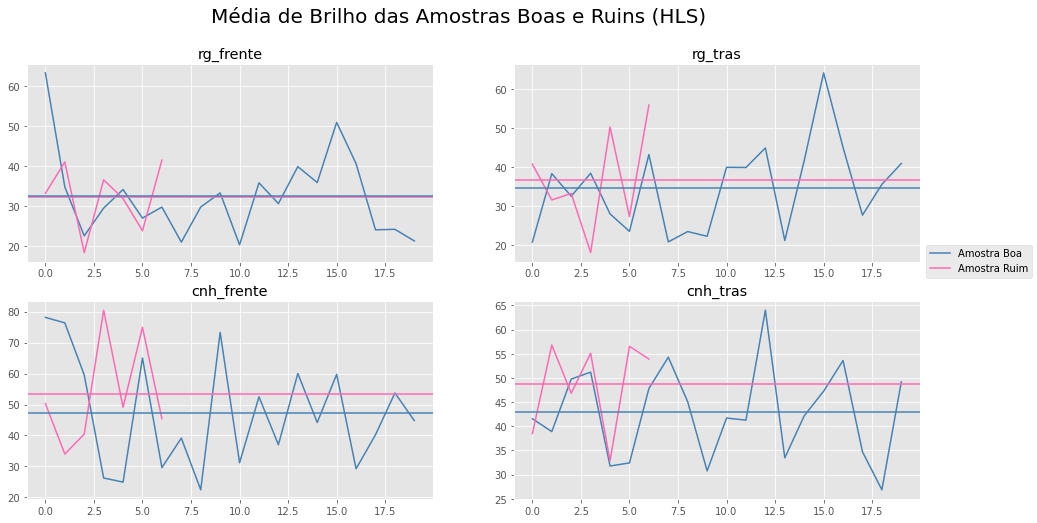

In [15]:
# Plot para visualizar a diferenças das médias de saturação de cada tipo de documento

n = len(documentos) # Número de figuras

fig = plt.figure(figsize=(16,8))

for i in range(n): # Laço para automatizar as plotagens
    fig.add_subplot(2,2,i+1) # Adiciona um novo subplot em cada iteração
        
    # Plot das médias de saturação das amostras
    plt.plot(list(range(20)), media_lig_bons[20*i:20*(i+1)], c='steelblue') # [20*i:20*(i+1)] iterar sobre a porção de cada
    plt.plot(list(range(7)), media_lig_ruins[7*i:7*(i+1)], c='hotpink')   # tipo de documento
    
    # Plot da média final de cada tipo de documento em forma de linha
    plt.axhline(media_lig_final_ruins[i], c='hotpink')
    plt.axhline(media_lig_final_bons[i], c='steelblue')
    
    plt.title(documentos[i])
    
fig.legend(['Amostra Boa','Amostra Ruim'], loc='center right')
fig.suptitle('Média de Brilho das Amostras Boas e Ruins (HLS)', fontsize=20)
plt.show();

Podemos ver que o brilho e a saturação do HLS são os mesmo valores de saturação e "valor" do HSV, respectivamente.

# 3. Calculando a média final do valor das amostras boas

In [16]:
# Calculando a média total de saturação de cada tipo de documento
media_val__ruins = []
media_val__bons = []

for i in range(len(documentos)):  
    media_val__ruins.append(np.mean(media_val_ruins[7*i:7*(i+1)]))
    media_val__bons.append(np.mean(media_val_bons[20*i:20*(i+1)]))

media_val_final_ruins = np.mean(media_val__ruins)
media_val_final_bons = np.mean(media_val__bons)

In [17]:
print('Média do "valor" de todas amostras boas: ', media_val_final_bons)
print('Média do "valor" de todas amostras ruins: ', media_val_final_ruins)

Média do "valor" de todas amostras boas:  210.40843142985
Média do "valor" de todas amostras ruins:  127.88887840634808


Tendo o valor da média do "valor" do HSV, podemos utilizá-lo para tentar melhorar  brilho das amostras ruins simplesmente ajustando o "valor" delas para o valor de referência encontrado.

# 4. Teste de ajuste de "valor" com a referência do "valor" médio encontrado

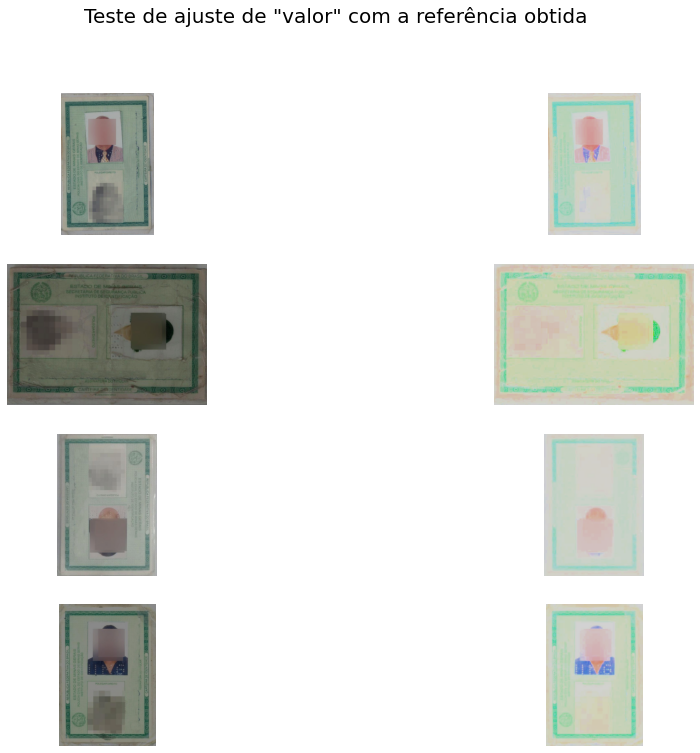

In [85]:
n = len(docs_ruins[0:4])

fig = plt.figure(figsize=(16,3*n))

for i in range(0,len(docs_ruins[0:4])):
    fig.add_subplot(n,2,(i*2)+1)
    plt.imshow(cv2.cvtColor(docs_ruins[i], cv2.COLOR_HSV2RGB))
    plt.axis('off')
    
    H, S, V =  cv2.split(docs_ruins[i])
    comp = np.absolute(V - media_val_final_bons)
    V = (V + comp).astype('uint8')
    
    fig.add_subplot(n,2,(i*2)+2)
    plt.imshow(cv2.cvtColor(cv2.merge([H, S, V]), cv2.COLOR_HSV2RGB))
    plt.axis('off')

fig.suptitle('Teste de ajuste de "valor" com a referência obtida', fontsize=20)
plt.show();

# 5. Conclusão

Nesse teste conseguimos verificar que o "valor" do padrão HSV possui maior representatividade na distinção das amostras boas e das ruins do que a saturação. Também vimos que o padrão HLS surte o mesmo efeito que o HSV para a quantização. Também foi possível ver que utilizar o "valor" de refência da média para as amostras ruins não torna essas amostras boas, acredito que seja devido ao fato de que um ganho "bruto" e uniforme em todos os pixels não tenha bom efeito como no sistema RGB.